In [1]:
#DEMO:PERFORM 

## DATASET

In [2]:
#WHOLESALE CUSTOMER DATA.CSV is the dataset that  

In [3]:
#importing Required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score,train_test_split,KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

## Data Analysis

- Checking Data

In [5]:
data=pd.read_csv('Wholesale customers data.csv')

In [6]:
pd.DataFrame({'count':data.isnull().sum(),'percentage':data.isnull().sum()/data.shape[0]})

,count,percentage
Channel,0,0.0
Region,0,0.0
Fresh,0,0.0
Milk,0,0.0
Grocery,0,0.0
Frozen,0,0.0
Detergents_Paper,0,0.0
Delicassen,0,0.0


In [7]:
target_ratio = pd.DataFrame({
    'count':data.Region.value_counts(),
    'Percentage':data.Region.value_counts()/len(data)
})
target_ratio

,count,Percentage
Region,,
3,316,0.718182
1,77,0.175000
2,47,0.106818


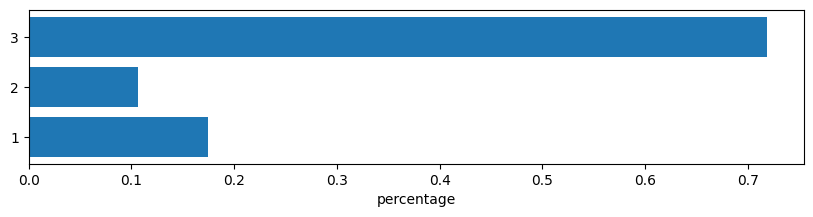

In [8]:
plt.figure(figsize=(10,2))
plt.barh(target_ratio.index,target_ratio.Percentage)
plt.xlabel('percentage')
plt.show()

- handling categorical features

In [9]:
data=pd.get_dummies(data,columns=['Channel'])

- scaling features

C:\Users\divu2\AppData\Local\Temp\ipykernel_9120\2135091350.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data[feat],labels=feat,vert=False)


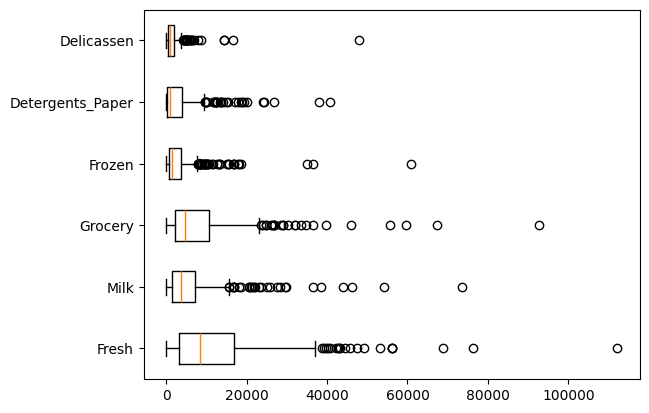

In [10]:
feat=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
plt.boxplot(data[feat],labels=feat,vert=False)
plt.show()

In [11]:
data[feat]=MinMaxScaler().fit_transform(data[feat])

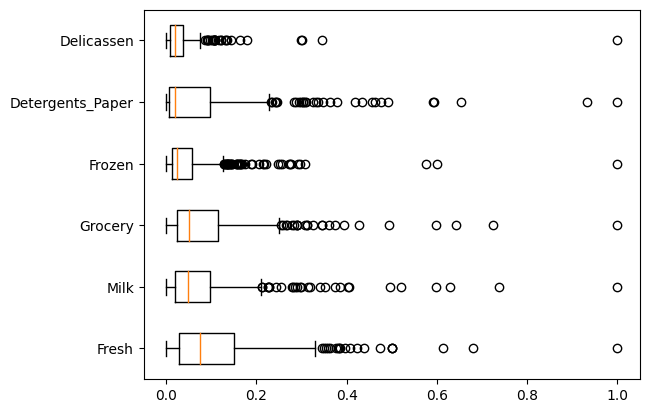

In [ ]:
plt.boxplot(data[feat],labels=feat,vert=False)
plt.show()

- keeping outliers as we don't want to miss some valuable information.

- NEW DATA

In [12]:
data.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2
0,3,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,False,True
1,3,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,False,True
2,3,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,False,True
3,3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,True,False
4,3,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,False,True


- selecting features

In [13]:
x=data.drop(['Region'],axis=1)
y=data.Region

- k-fold cross validator

### **Following parameters are availabe in K-Fold Cross Validator:**
- n_split:int Number of folds by default 5 and minimum value should be 2.


In [14]:
kf=KFold(n_splits=4)
kf.get_n_splits(x,y)

4

In [15]:
clf=DecisionTreeClassifier()
for train_ind,test_ind in kf.split(x,y):
    clf.fit(x.iloc[train_ind,:],y.iloc[train_ind])
    pred=clf.predict(x.iloc[test_ind,:])
    print(round(accuracy_score(y[test_ind],pred),3))

0.627
0.573
0.245
0.609


### **Cross validator**

In [16]:
cv=cross_val_score(DecisionTreeClassifier(),x,y,cv=4,scoring='accuracy')
cv

array([0.57272727, 0.48181818, 0.5       , 0.53636364])